# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [108]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [109]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [110]:
#url and api code
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=a3d53eb77ba7c47b76c7954ab5ece395"

#set list and count
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0
set_count = 1

#start
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

#call api and print cities
for city in cities:
    response = requests.get(url + "&q=" + city + "&units=Imperial")
    response_json = response.json()
    if count < 50:
        count += 1
    else:
        set_count += 1
        count = 0
    try:
        cityname.append(response_json['city']['name'])
        cloudiness.append(response_json['list'][0]['clouds']['all'])
        country.append(response_json['city']['country'])
        date.append(response_json['list'][0]['dt'])
        humidity.append(response_json['list'][0]['main']['humidity'])
        lat.append(response_json['city']['coord']['lat'])
        lng.append(response_json['city']['coord']['lon'])
        max_temp.append(response_json['list'][0]['main']['temp_max'])
        wind_speed.append(response_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set {set_count} | {city}")
    except:
        print("City not found. Skipping...") 
        pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

 6 | knysna
Processing record 11 of Set 6 | pozo colorado
Processing record 13 of Set 6 | flinders
Processing record 15 of Set 6 | bilma
Processing record 17 of Set 6 | rundu
Processing record 19 of Set 6 | elat
City not found. Skipping...
Processing record 22 of Set 6 | gobabis
Processing record 24 of Set 6 | mawlaik
Processing record 26 of Set 6 | maragogi
Processing record 28 of Set 6 | san vicente
Processing record 30 of Set 6 | el fuerte
Processing record 32 of Set 6 | turukhansk
Processing record 34 of Set 6 | komsomolskiy
Processing record 36 of Set 6 | kapuskasing
Processing record 38 of Set 6 | sturgeon falls
Processing record 40 of Set 6 | bathsheba
Processing record 42 of Set 6 | thinadhoo
Processing record 44 of Set 6 | nanortalik
Processing record 46 of Set 6 | hithadhoo
Processing record 48 of Set 6 | vestmannaeyjar
Processing record 50 of Set 6 | portobelo
Processing record 1 of Set 7 | roebourne
Processing record 3 of Set 7 | havoysund
City not found. Skipping...
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [111]:
#create table and dictionary
weather_table = {"City": cityname, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed    
 }
#create dataframe
weather_data = pd.DataFrame(weather_table)
weather_data.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [180]:
#set table

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,92,CA,1584630000,99,62.4560,-114.3525,-8.77,7.61
1,Magdalena,95,PH,1584630000,95,14.1999,121.4290,78.89,4.03
2,Lavrentiya,100,RU,1584630000,97,65.5833,-171.0000,30.83,21.45
3,Nichinan,100,JP,1584630000,54,31.6000,131.3667,56.03,17.65
4,Rikitea,100,PF,1584630000,79,-23.1203,-134.9692,78.71,9.51


In [181]:
weather_data.to_csv("weather_data.csv")

In [183]:
### Plotting the Data
#* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

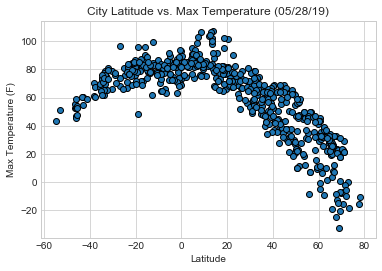

In [184]:
#create scatter plot and plot titles and labels and save
scatter_lat = weather_data["Lat"]
scatter_temp = weather_data["Max Temp"]
plt.scatter(scatter_lat, scatter_temp, marker = 'o', edgecolors = 'black')
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("scatLatvsTem")
plt.show()


#### Latitude vs. Humidity Plot

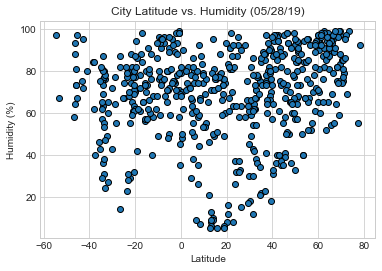

In [185]:
#create scatter plot and plot titles and labels and save
scatter_lat = weather_data["Lat"]
scatter_hum = weather_data["Humidity"]
plt.scatter(scatter_lat, scatter_hum, marker = 'o', edgecolors = 'black')
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("scatLatvsHum")
plt.show()


#### Latitude vs. Cloudiness Plot

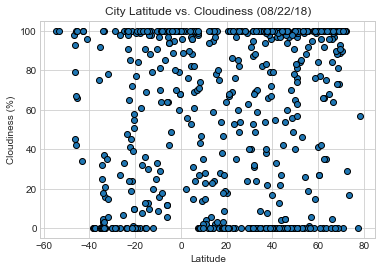

In [186]:
#create scatter plot and plot titles and labels and save
scatter_lat = weather_data["Lat"]
scatter_clou = weather_data["Cloudiness"]
plt.scatter(scatter_lat, scatter_clou, marker = 'o', edgecolors = 'black')
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("scatLatvsCloud")
plt.show()


#### Latitude vs. Wind Speed Plot

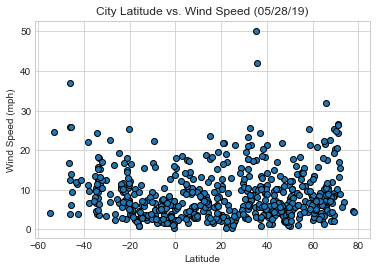

In [187]:
#create scatter plot and plot titles and labels and save
scatter_lat = weather_data["Lat"]
scatter_wind = weather_data["Wind Speed"]
plt.scatter(scatter_lat, scatter_wind, marker = 'o', edgecolors = 'black')
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("scatLatvsWind")
plt.show()

## Linear Regression

In [188]:
# OPTIONAL: Create a function to create Linear Regression plots


In [189]:
# Create Northern and Southern Hemisphere DataFrames
#Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude
north = weather_data.loc[weather_data["Lat"] >= 0,:]
south = weather_data.loc[weather_data["Lat"] < 0,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

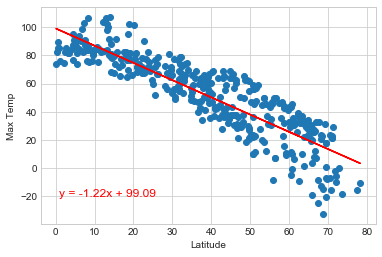

In [190]:
#set x and y axis
x_value = north['Lat']
y_value = north['Max Temp']

#linear regression North tem vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
fit =  x_value * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value ,fit,"r-")
plt.annotate(equation, (1, -20), fontsize = 12, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("NorthRegressLatVSTemp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

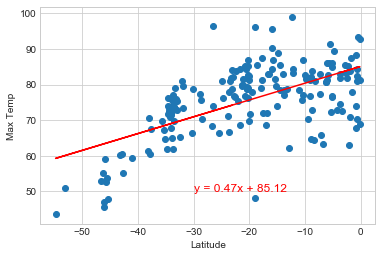

In [191]:
#set x and y axis
x_value = south['Lat']
y_value = south['Max Temp']

#linear regression South tem vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
fit =  x_value * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value ,fit,"r-")
plt.annotate(equation, (-30, 50), fontsize = 12, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("SouthRegressLatVSTemp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

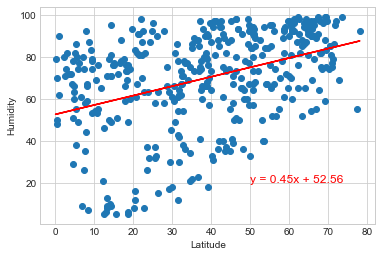

In [192]:
#set x and y axis
x_value = north['Lat']
y_value = north['Humidity']

#linear regression North humidity vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
fit =  x_value * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value ,fit,"r-")
plt.annotate(equation, (50, 20), fontsize = 12, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("SouthRegressLatVSHum")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

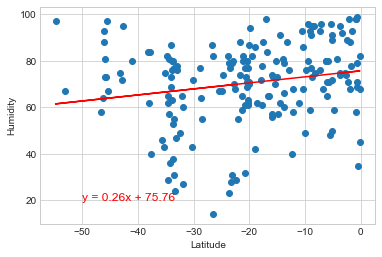

In [193]:
#set x and y axis
x_value = south['Lat']
y_value = south['Humidity']

#linear regression North humidity vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
fit =  x_value * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value ,fit,"r-")
plt.annotate(equation, (-50, 20), fontsize = 12, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("SouthRegressLatVSHum")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

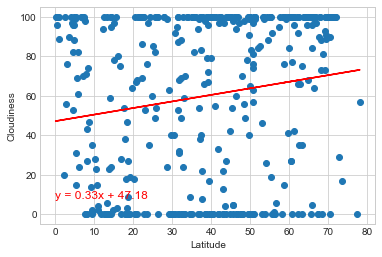

In [194]:
#set x and y axis
#linear regression North cloud vs lat
x_value = north['Lat']
y_value = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
fit =  x_value * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value ,fit,"r-")
plt.annotate(equation, (0, 8), fontsize = 12, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("NorthRegressLatVSCloud")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

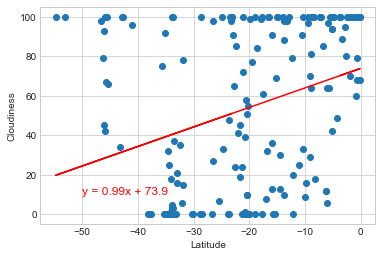

In [195]:
#set x and y axis
#linear regression South cloud vs lat
x_value = south['Lat']
y_value = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
fit =  x_value * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value ,fit,"r-")
plt.annotate(equation, (-50, 10), fontsize = 12, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("SouthRegressLatVSCloud")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

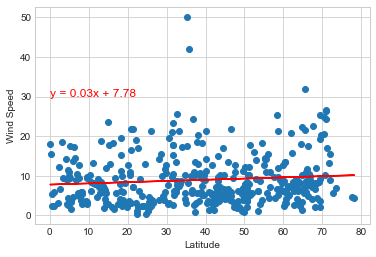

In [196]:
#set x and y axis
#linear regression North wind speed vs lat
x_value = north['Lat']
y_value = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
fit =  x_value * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value ,fit,"r-")
plt.annotate(equation, (0, 30), fontsize = 12, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("NorthRegressLatVSWind")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

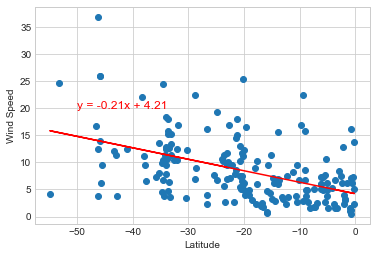

In [197]:
#set x and y axis
#linear regression South wind speed vs lat
x_value = south['Lat']
y_value = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
fit =  x_value * slope + intercept
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value)
plt.plot(x_value ,fit,"r-")
plt.annotate(equation, (-50, 20), fontsize = 12, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("SouthRegressLatVSWind")
plt.show()